In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
df = pd.read_csv("advertising.csv")

In [7]:
data.head()
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [33]:
#data.drop(['Unnamed: 0'], axis=1)

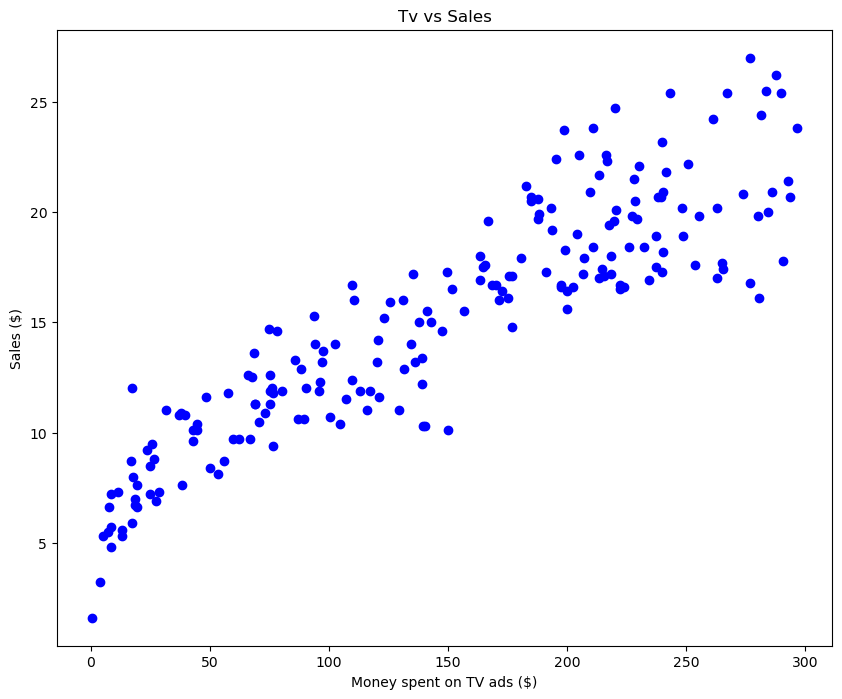

In [12]:
plt.figure(figsize=(10, 8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='blue'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.title("Tv vs Sales")
plt.show()

In [13]:
X = data['TV']
y = data['Sales']

# adding constant to calculate intercept
Xc= sm.add_constant(X)

In [14]:
#train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(Xc,y,test_size=.2,random_state=10)

## Simple linear regression 

In [37]:
y_test.shape

(40,)

In [36]:
# OLS (Statsmodels)
model=sm.OLS(y_train,x_train)
model1=model.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     664.5
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           1.76e-58
Time:                        15:11:40   Log-Likelihood:                -351.10
No. Observations:                 160   AIC:                             706.2
Df Residuals:                     158   BIC:                             712.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9948      0.353     19.804      0.0

In [12]:
# 1st part of the table
# DF
# F stat
# Measures of variations : Rsquared (Explained + unexplained variations)

In [29]:
model1.pvalues

const    5.027719e-54
TV       7.927912e-74
dtype: float64

In [14]:
#2nd part of the table
# Coefficients
# std error
# t- stat
# P values
# confidance Interval

In [34]:
model1.tvalues

const    21.623767
TV       29.260497
dtype: float64

In [38]:
ypred=model1.predict(x_test)
ypred

59     18.524475
5       7.470840
20     18.945826
198    22.513633
52     18.836384
19     15.055165
162    17.304197
55     17.878767
69     18.858272
2       7.935968
98     22.847431
10     10.611823
75      7.919552
142    19.060740
124    19.553229
63     12.614611
109    20.970502
78      7.290261
111    20.220824
185    18.212565
154    17.271365
130     7.033072
61     21.293355
87     13.052378
102    22.327582
121     8.023522
136     8.395624
1       9.429850
47     20.122327
172     8.067298
159    14.201518
39     19.471147
76      8.499594
91      8.559787
35     22.902152
178    22.136058
127    11.383389
169    22.551937
46     11.903238
174    19.164710
dtype: float64

In [48]:
SSR = np.sum(((ypred-y_test.mean())**2))
SSE=np.sum((y_test-ypred)**2)
print(SSR)
print(SSE)
SST=SSE+SSR
#print() # SST

1218.4192022002971
291.49614232469685


In [50]:
r_sq=SSR/SST
r_sq

0.8069453738703484

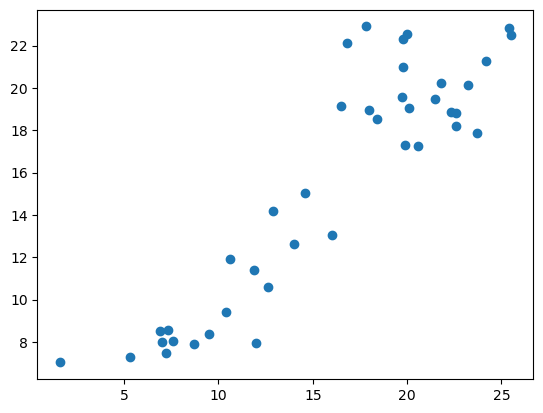

In [52]:
plt.scatter(y_test,ypred)

In [15]:
# Error metrics

# RMSE
# MAPE


In [54]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
rmse=np.sqrt(mean_squared_error(y_test,ypred))
rmse

2.6995191346084995

In [51]:
((32+33+70)/(80+80))*100 #ignore

84.375

In [16]:
# if categorical?  

## Multiple linear regression 

In [59]:

X = data[['TV','Radio','Newspaper']]
y = data['Sales']

# adding constant to calculate intercept
Xc= sm.add_constant(X)
# Adjusted r-square
# OLS (Statsmodels)
#train test split

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(Xc,y,test_size=.2,random_state=10)
model=sm.OLS(y_train,x_train)
model1=model.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     507.6
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           3.10e-80
Time:                        15:53:25   Log-Likelihood:                -292.99
No. Observations:                 160   AIC:                             594.0
Df Residuals:                     156   BIC:                             606.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7931      0.317     15.110      0.0

In [63]:
#3rd part of the table-----Assumptions

#1. linearity
# ccorrelation function
# scatter plot
# Linear rainbow test
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


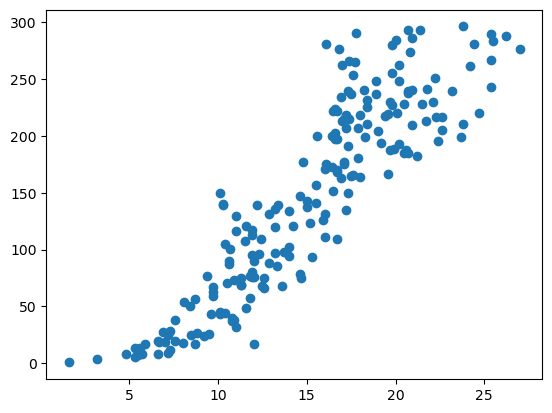

In [74]:
plt.scatter(y=data.TV,x=data.Sales)

In [69]:
#lenear rainbow test

from statsmodels.stats.diagnostic import linear_rainbow
t,p=linear_rainbow(model1,frac=.5)
p

0.9210469557349112

In [80]:
#2. Multi colinearity
# Correlation function
# VIF
# Condition number

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vif=pd.DataFrame()

vif['vif']=[VIF(X.values,i) for i in range(X.shape[1])]
vif['feat']=X.columns
vif.sort_values(by='vif',ascending=False)



,vif,feat
1,3.285462,Radio
2,3.055245,Newspaper
0,2.486772,TV


-0.11298317782697646


/var/folders/w4/b4glxfbd7c1522mj2spjmg4r0000gn/T/ipykernel_64674/1765258454.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model1.resid)


<Axes: ylabel='Density'>

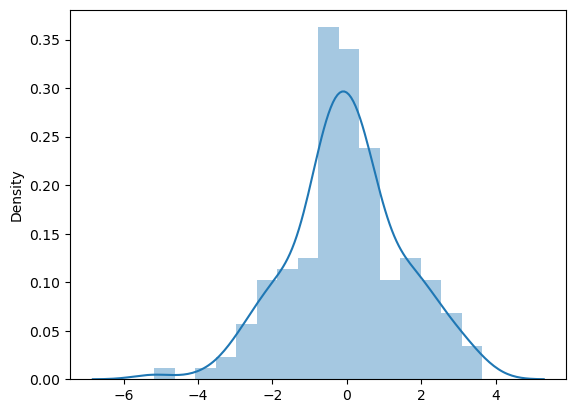

In [85]:
#3. Normality of residuals
# plots
# Shapiro wilk test
# Jerque bera test

print(model1.resid.skew())
sns.distplot(model1.resid)

<Axes: >

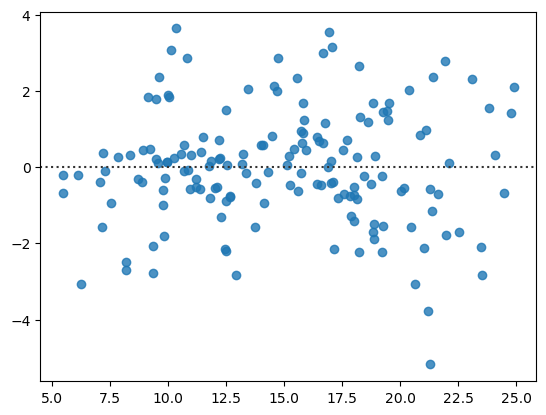

In [88]:
#4. Heteroskadasticity
# residual plot
# breusch pagan test


In [95]:
residual=y_test-ypred
sns.residplot(x=ypred,y=model1.residual)


AttributeError: 'OLSResults' object has no attribute 'residual'

In [23]:
#5. auto corelation
# Residual plot
# Durbin watson test



In [24]:
# SKlearn function



In [25]:
# cross validation



In [26]:
# bias variance tradeoff